In [1]:
import numpy as np
import os, glob, re, cv2, keras
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model, load_model, Sequential
from keras.applications import MobileNetV2
from keras.applications import MobileNet
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [2]:
imgSize = 224
outSize = 4
imgFolder = 'new_image'
imgPathAry = glob.glob(imgFolder + '/*' + 'jpg')

dataSet = []
labelSet = []
for imgPath in imgPathAry:
    img = load_img(imgPath)
    img_data = img_to_array(img)
    dataSet.append(img_data)
    
    bbox = list(map(int, imgPath.split("_")[-1].split(".")[0].split(',')))
    labelSet.append(bbox)
    
xs = np.array(dataSet, np.float32) / 255.0
ys = np.array(labelSet, np.uint8)

In [3]:
#Load used model.
#model = load_model('result.h5')

#New Model setup.
inputs = Input(shape=(imgSize, imgSize, 3))
mobilenet_model = MobileNet(input_shape=(imgSize, imgSize, 3), alpha=0.5, include_top=False, weights='imagenet', input_tensor=inputs, pooling='max')
#mobilenet_model = MobileNetV2(input_shape=(imgSize, imgSize, 3), alpha=0.5, include_top=False, weights='imagenet', input_tensor=inputs, pooling='max')
net = Dense(128, activation='relu')(mobilenet_model.layers[-1].output)
net = Dense(64, activation='relu')(net)
net = Dense(outSize, activation='linear')(net)
model = Model(inputs = inputs, outputs=net)
#model.summary()
model.compile(optimizer = keras.optimizers.Adam(), loss='mse')

In [4]:
model.fit(xs, ys, epochs=30, batch_size=32, shuffle=True, verbose=1, validation_split=0.1)
print('done')

Epoch 1/30
5/5 [==============================] - 7s 1s/step - loss: 13488.7773 - val_loss: 8752.9619
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 7595.4312 - val_loss: 4531.4697
Epoch 3/30
5/5 [==============================] - 7s 1s/step - loss: 2840.4436 - val_loss: 1828.4282
Epoch 4/30
5/5 [==============================] - 7s 1s/step - loss: 1533.8562 - val_loss: 1266.5800
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 1395.6377 - val_loss: 1256.0978
Epoch 6/30
5/5 [==============================] - 7s 1s/step - loss: 1025.9587 - val_loss: 1404.6348
Epoch 7/30
5/5 [==============================] - 7s 1s/step - loss: 780.4894 - val_loss: 1214.6381
Epoch 8/30
5/5 [==============================] - 6s 1s/step - loss: 621.1161 - val_loss: 1039.3529
Epoch 9/30
5/5 [==============================] - 6s 1s/step - loss: 588.9625 - val_loss: 982.0977
Epoch 10/30
5/5 [==============================] - 6s 1s/step - loss: 381.6282 - val_loss: 989

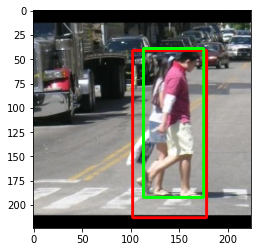

In [8]:
index = 2
my = cv2.cvtColor(cv2.imread(imgPathAry[index]), cv2.COLOR_BGR2RGB)
pred = img_to_array(my) / 255
pred = np.expand_dims(pred, axis=0)
result = model.predict(pred)[0].astype(np.uint8)
t = labelSet[index]
my = cv2.rectangle(my, (result[0], result[1]), (result[2], result[3]), (255,0,0), 2)
my = cv2.rectangle(my, (t[0], t[1]), (t[2], t[3]), (0, 255,0), 2)
plt.imshow(my)